
![Image](https://github.com/julienbordet/spread/raw/master/images/Models.png)

In [1]:

import sys

# Insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, '../py')

In [2]:

%run ../../load_magic/dataframes.py
%run ../../load_magic/environment.py
%run ../../load_magic/lists.py
%run ../../load_magic/paths.py
%run ../../load_magic/soup.py
%run ../../load_magic/storage.py
%pprint

from bs4 import BeautifulSoup as bs
import networkx as nx
import numpy as np
import re
import urllib.request
import wikipedia

notebook_path = get_notebook_path()
print(notebook_path)
s = Storage()
pandemic_df = s.load_object('pandemic_df')
print(['s.{}'.format(fn) for fn in dir(s) if not fn.startswith('_')])
dir()

Pretty printing has been turned OFF
D:\Documents\Repositories\notebooks\covid19\ipynb\Simulation.ipynb
['s.attempt_to_pickle', 's.data_csv_folder', 's.data_folder', 's.encoding_type', 's.load_csv', 's.load_dataframes', 's.load_object', 's.save_dataframes', 's.saves_csv_folder', 's.saves_folder', 's.saves_pickle_folder', 's.store_objects']


['Config', 'In', 'Out', 'Path', 'RandomForestClassifier', 'SequenceMatcher', 'Storage', '_', '__', '___', '__builtin__', '__builtins__', '__doc__', '__loader__', '__name__', '__nonzero__', '__package__', '__spec__', '_dh', '_i', '_i1', '_i2', '_ih', '_ii', '_iii', '_oh', 'bs', 'check_4_doubles', 'check_for_typos', 'conjunctify_list', 'copyfile', 'csv', 'encoding', 'example_iterrows', 'exit', 'filepath_regex', 'get_classifier', 'get_column_descriptions', 'get_data_structs_dataframe', 'get_datastructure_prediction', 'get_dir_tree', 'get_git_lfs_track_commands', 'get_importances', 'get_input_sample', 'get_ipython', 'get_max_rsquared_adj', 'get_module_version', 'get_notebook_path', 'get_page_soup', 'get_page_tables', 'get_specific_gitignore_files', 'get_struct_name', 'humanize_bytes', 'io', 'ipykernel', 'json', 'jupyter_config_dir', 'math', 'notebook_path', 'notebookapp', 'np', 'nx', 'os', 'pandemic_df', 'pd', 'pickle', 'plt', 'preprocess_data', 'print_all_files_ending_starting_with', 'pri

In [57]:

from DiseaseBoard import DiseaseBoard

tours = 60
board_size = 30
nb_clusters = 3
db = DiseaseBoard(board_size, tours, nb_clusters)
db.reset()
print(['db.{}'.format(fn) for fn in dir(db) if not fn.startswith('_')])

['db.R0', 'db.clusterNbr', 'db.contagionDelay', 'db.contagionRate', 'db.currentRound', 'db.deceasedData', 'db.deceasedDelay', 'db.deceasedNbr', 'db.diagnosedNbr', 'db.diagnosisDelay', 'db.hospitalizedData', 'db.hospitalizedDelay', 'db.hospitalizedNbr', 'db.hospitalizedRate', 'db.immunityRate', 'db.infectedData', 'db.initBoard', 'db.lastBoard', 'db.mortalityDelay', 'db.mortalityRate', 'db.nextRound', 'db.population', 'db.quarantineRate', 'db.quarantinedData', 'db.quarantinedNbr', 'db.reset', 'db.sickNbr', 'db.socialDistancingContagionRate', 'db.socialDistancingDelay']


In [60]:

db.socialDistancingDelay

-1

In [5]:

import spread

def f(x):
    if re.search('^[A-Z][a-z]', str(x)):
        result = True
    else:
        result = False
    
    return result

print(['spread.{}'.format(fn) for fn in dir(spread) if f(fn)])

['spread.DiseaseBoard', 'spread.MainWindow', 'spread.PlotWidget', 'spread.Pos', 'spread.Qt', 'spread.QtCriticalMsg', 'spread.QtDebugMsg', 'spread.QtFatalMsg', 'spread.QtInfoMsg', 'spread.QtMsgType', 'spread.QtSystemMsg', 'spread.QtWarningMsg']


In [12]:

print(['spread.MainWindow.{}'.format(fn) for fn in dir(spread.MainWindow) if not fn.startswith('_')])

['spread.MainWindow.AllowNestedDocks', 'spread.MainWindow.AllowTabbedDocks', 'spread.MainWindow.AnimatedDocks', 'spread.MainWindow.DockOption', 'spread.MainWindow.DockOptions', 'spread.MainWindow.DrawChildren', 'spread.MainWindow.DrawWindowBackground', 'spread.MainWindow.ForceTabbedDocks', 'spread.MainWindow.GroupedDragging', 'spread.MainWindow.IgnoreMask', 'spread.MainWindow.PaintDeviceMetric', 'spread.MainWindow.PdmDepth', 'spread.MainWindow.PdmDevicePixelRatio', 'spread.MainWindow.PdmDevicePixelRatioScaled', 'spread.MainWindow.PdmDpiX', 'spread.MainWindow.PdmDpiY', 'spread.MainWindow.PdmHeight', 'spread.MainWindow.PdmHeightMM', 'spread.MainWindow.PdmNumColors', 'spread.MainWindow.PdmPhysicalDpiX', 'spread.MainWindow.PdmPhysicalDpiY', 'spread.MainWindow.PdmWidth', 'spread.MainWindow.PdmWidthMM', 'spread.MainWindow.RenderFlag', 'spread.MainWindow.RenderFlags', 'spread.MainWindow.VerticalTabs', 'spread.MainWindow.acceptDrops', 'spread.MainWindow.accessibleDescription', 'spread.MainWind

In [11]:

print(['spread.DiseaseBoard.{}'.format(fn) for fn in dir(spread.DiseaseBoard) if not fn.startswith('_')])

['spread.DiseaseBoard.R0', 'spread.DiseaseBoard.clusterNbr', 'spread.DiseaseBoard.contagionDelay', 'spread.DiseaseBoard.contagionRate', 'spread.DiseaseBoard.currentRound', 'spread.DiseaseBoard.deceasedData', 'spread.DiseaseBoard.deceasedDelay', 'spread.DiseaseBoard.deceasedNbr', 'spread.DiseaseBoard.diagnosedNbr', 'spread.DiseaseBoard.diagnosisDelay', 'spread.DiseaseBoard.hospitalizedData', 'spread.DiseaseBoard.hospitalizedDelay', 'spread.DiseaseBoard.hospitalizedNbr', 'spread.DiseaseBoard.hospitalizedRate', 'spread.DiseaseBoard.immunityRate', 'spread.DiseaseBoard.infectedData', 'spread.DiseaseBoard.initBoard', 'spread.DiseaseBoard.lastBoard', 'spread.DiseaseBoard.mortalityDelay', 'spread.DiseaseBoard.mortalityRate', 'spread.DiseaseBoard.nextRound', 'spread.DiseaseBoard.population', 'spread.DiseaseBoard.quarantineRate', 'spread.DiseaseBoard.quarantinedData', 'spread.DiseaseBoard.quarantinedNbr', 'spread.DiseaseBoard.reset', 'spread.DiseaseBoard.sickNbr', 'spread.DiseaseBoard.socialDist

In [8]:

import DiseaseBoard

def f(x):
    if re.search('^[A-Z][a-z]', str(x)):
        result = True
    else:
        result = False
    
    return result

print(['DiseaseBoard.{}'.format(fn) for fn in dir(DiseaseBoard) if not fn.startswith('_')])

['DiseaseBoard.DiseaseBoard', 'DiseaseBoard.STATE', 'DiseaseBoard.np', 'DiseaseBoard.random', 'DiseaseBoard.randrange']


In [10]:

print(['DiseaseBoard.STATE.{}'.format(fn) for fn in dir(DiseaseBoard.STATE) if not fn.startswith('_')])

['DiseaseBoard.STATE.clear', 'DiseaseBoard.STATE.copy', 'DiseaseBoard.STATE.fromkeys', 'DiseaseBoard.STATE.get', 'DiseaseBoard.STATE.items', 'DiseaseBoard.STATE.keys', 'DiseaseBoard.STATE.pop', 'DiseaseBoard.STATE.popitem', 'DiseaseBoard.STATE.setdefault', 'DiseaseBoard.STATE.update', 'DiseaseBoard.STATE.values']


In [9]:

print(['DiseaseBoard.DiseaseBoard.{}'.format(fn) for fn in dir(DiseaseBoard.DiseaseBoard) if not fn.startswith('_')])

['DiseaseBoard.DiseaseBoard.R0', 'DiseaseBoard.DiseaseBoard.clusterNbr', 'DiseaseBoard.DiseaseBoard.contagionDelay', 'DiseaseBoard.DiseaseBoard.contagionRate', 'DiseaseBoard.DiseaseBoard.currentRound', 'DiseaseBoard.DiseaseBoard.deceasedData', 'DiseaseBoard.DiseaseBoard.deceasedDelay', 'DiseaseBoard.DiseaseBoard.deceasedNbr', 'DiseaseBoard.DiseaseBoard.diagnosedNbr', 'DiseaseBoard.DiseaseBoard.diagnosisDelay', 'DiseaseBoard.DiseaseBoard.hospitalizedData', 'DiseaseBoard.DiseaseBoard.hospitalizedDelay', 'DiseaseBoard.DiseaseBoard.hospitalizedNbr', 'DiseaseBoard.DiseaseBoard.hospitalizedRate', 'DiseaseBoard.DiseaseBoard.immunityRate', 'DiseaseBoard.DiseaseBoard.infectedData', 'DiseaseBoard.DiseaseBoard.initBoard', 'DiseaseBoard.DiseaseBoard.lastBoard', 'DiseaseBoard.DiseaseBoard.mortalityDelay', 'DiseaseBoard.DiseaseBoard.mortalityRate', 'DiseaseBoard.DiseaseBoard.nextRound', 'DiseaseBoard.DiseaseBoard.population', 'DiseaseBoard.DiseaseBoard.quarantineRate', 'DiseaseBoard.DiseaseBoard.qua

In [3]:

!start %windir%\explorer.exe "{os.path.abspath(s.saves_pickle_folder)}"

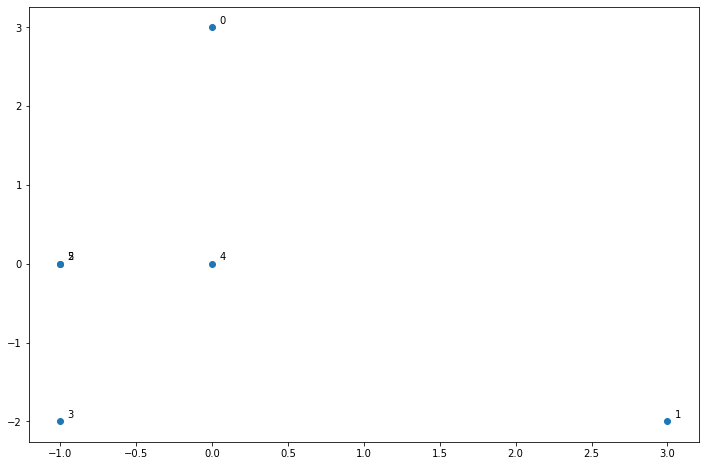

In [33]:

# First order (linear) scatterplot
X = np.array([[random.randrange(-3, 4), random.randrange(-3, 4)], [random.randrange(-3, 4), random.randrange(-3, 4)],
              [random.randrange(-3, 4), random.randrange(-3, 4)], [random.randrange(-3, 4), random.randrange(-3, 4)],
              [random.randrange(-3, 4), random.randrange(-3, 4)], [random.randrange(-3, 4), random.randrange(-3, 4)]])
fig1_fig = plt.figure(figsize=(12,8))
merge_axes_subplot = plt.scatter(x=X[:,0], y=X[:,1])
    
# Add annotations
for label, x, y in zip(range(X.shape[0]), X[:,0], X[:,1]):
    annotation = plt.annotate('{}'.format(label), xy=(x+0.05, y+0.05))

In [20]:

from mathutils import Vector

vector_dict = {}
for label, x, y in zip(range(X.shape[0]), X[:,0], X[:,1]):
    v = Vector((x, y))
    vector_dict[label] = v

In [35]:

from sklearn.neighbors import KDTree

kdt = KDTree(X, leaf_size=30, metric='euclidean')
distance_array = kdt.query(X, k=2, return_distance=True)
f_str = 'The nearest neighbor for {}, who is at {},{} is {}, who is {} units away (and is at {},{}) and should be reflected to {},{}.'
array_list = []
for person_neighbor, distance_distance in zip(distance_array[1], distance_array[0]):
    person = person_neighbor[0]
    p_vector = Vector(X[person])
    neighbor = person_neighbor[1]
    n_vector = Vector(X[neighbor])
    distance = distance_distance[1]
    d_vector = p_vector - n_vector
    reflect = p_vector + 0.25*d_vector
    array_list.append([reflect.xy[0], reflect.xy[1]])
    print(f_str.format(person, X[person][0], X[person][1], neighbor, distance, X[neighbor][0], X[neighbor][1], reflect.xy[0], reflect.xy[1]))

The nearest neighbor for 0, who is at 0,3 is 4, who is 3.0 units away (and is at 0,0) and should be reflected to 0.0,3.75.
The nearest neighbor for 1, who is at 3,-2 is 4, who is 3.605551275463989 units away (and is at 0,0) and should be reflected to 3.75,-2.5.
The nearest neighbor for 5, who is at -1,0 is 2, who is 0.0 units away (and is at -1,0) and should be reflected to -1.0,0.0.
The nearest neighbor for 3, who is at -1,-2 is 2, who is 2.0 units away (and is at -1,0) and should be reflected to -1.0,-2.5.
The nearest neighbor for 4, who is at 0,0 is 2, who is 1.0 units away (and is at -1,0) and should be reflected to 0.25,0.0.
The nearest neighbor for 5, who is at -1,0 is 2, who is 0.0 units away (and is at -1,0) and should be reflected to -1.0,0.0.


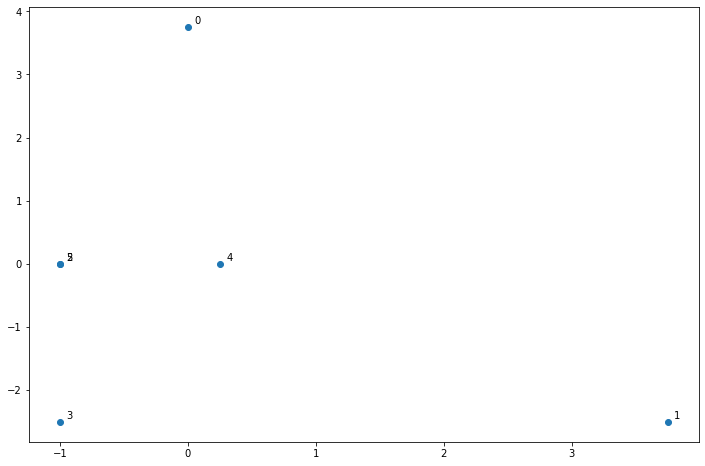

In [36]:

# First order (linear) scatterplot
R = np.array(array_list)
fig1_fig = plt.figure(figsize=(12,8))
merge_axes_subplot = plt.scatter(x=R[:,0], y=R[:,1])
    
# Add annotations
for label, x, y in zip(range(R.shape[0]), R[:,0], R[:,1]):
    annotation = plt.annotate('{}'.format(label), xy=(x+0.05, y+0.05))

In [5]:

kdt.query(X, k=2, return_distance=True)[1]

array([[0, 1],
       [1, 0],
       [2, 1],
       [3, 4],
       [4, 3],
       [5, 4]], dtype=int64)

In [7]:


Vector(X[person]).angle(Vector(X[neighbor]))

0.12435512244701385

In [9]:

v.reflect(Vector(X[neighbor]))

Vector((-1.3999998569488525, -0.19999992847442627))

In [24]:

reflect = v.reflect(Vector(X[person]))
#print(['reflect.{}'.format(fn) for fn in dir(reflect) if not fn.startswith('_')])


(-3.0, -2.0)

In [ ]:

import sys

command_str = '{sys.executable} -m pip install --upgrade pyqtgraph'.format(sys=sys)
print(command_str)
!{command_str}

C:\Users\577342\AppData\Local\Continuum\anaconda3\python.exe -m pip install --upgrade pyqtgraph


In [35]:

print(['Vector.{}'.format(fn) for fn in dir(Vector) if not fn.startswith('_')])

['Vector.Fill', 'Vector.Linspace', 'Vector.Range', 'Vector.Repeat', 'Vector.angle', 'Vector.angle_signed', 'Vector.copy', 'Vector.cross', 'Vector.dot', 'Vector.freeze', 'Vector.is_frozen', 'Vector.is_wrapped', 'Vector.length', 'Vector.length_squared', 'Vector.lerp', 'Vector.magnitude', 'Vector.negate', 'Vector.normalize', 'Vector.normalized', 'Vector.orthogonal', 'Vector.owner', 'Vector.project', 'Vector.reflect', 'Vector.resize', 'Vector.resize_2d', 'Vector.resize_3d', 'Vector.resize_4d', 'Vector.resized', 'Vector.rotate', 'Vector.rotation_difference', 'Vector.slerp', 'Vector.to_2d', 'Vector.to_3d', 'Vector.to_4d', 'Vector.to_track_quat', 'Vector.to_tuple', 'Vector.w', 'Vector.ww', 'Vector.www', 'Vector.wwww', 'Vector.wwwx', 'Vector.wwwy', 'Vector.wwwz', 'Vector.wwx', 'Vector.wwxw', 'Vector.wwxx', 'Vector.wwxy', 'Vector.wwxz', 'Vector.wwy', 'Vector.wwyw', 'Vector.wwyx', 'Vector.wwyy', 'Vector.wwyz', 'Vector.wwz', 'Vector.wwzw', 'Vector.wwzx', 'Vector.wwzy', 'Vector.wwzz', 'Vector.wx',

In [36]:

Vector?

Init signature: Vector(self, /, *args, **kwargs)
Docstring:     
.. class:: Vector(seq)

This object gives access to Vectors in Blender.

:param seq: Components of the vector, must be a sequence of at least two
:type seq: sequence of numbers
Type:           type
Subclasses:     
